In [11]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# Load dataset
df = pd.read_csv("Complete_Transaction_Statement.csv")

In [4]:
# Preprocess
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Credit'] = df['Credit'].fillna(0)
df['Debit'] = df['Debit'].fillna(0)
df['Amount'] = df['Credit'] - df['Debit']
df['Month'] = df['Datetime'].dt.to_period('M')

In [5]:
monthly_models = {}
monthly_datasets = {}

for month, group in df.groupby('Month'):
    X = group[['Amount', 'Balance']]
    model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
    model.fit(X)
    monthly_models[str(month)] = model
    monthly_datasets[str(month)] = group

In [6]:
def detect_monthly_anomaly(transaction_row):
    credit = transaction_row.get('Credit', 0)
    debit = transaction_row.get('Debit', 0)
    balance = transaction_row.get('Balance', 0)
    date_str = transaction_row.get('Date')  # e.g., '2025-07-15'
    amount = credit - debit

    try:
        input_month = pd.to_datetime(date_str).to_period('M')
        month_key = input_month.strftime('%Y-%m')
        model = monthly_models.get(month_key)

        # If month not found (i.e., future), use most recent available model
        if not model:
            latest_month_key = sorted(monthly_models.keys())[-1]
            print(f"[Info] Using latest available model from: {latest_month_key}")
            model = monthly_models[latest_month_key]

        features_df = pd.DataFrame([[amount, balance]], columns=['Amount', 'Balance'])
        prediction = model.predict(features_df)
        return 'Anomaly' if prediction[0] == -1 else 'Normal'
    except Exception as e:
        return f"Error: {e}"


In [7]:
sample_transaction = {
    'Credit': 0.0,
    'Debit': 1000.92,
    'Balance': 6679.58,
    'Date': '2025-04-02'
}

result = detect_monthly_anomaly(sample_transaction)
print("Result:", result)

[Info] Using latest available model from: 2024-12
Result: Anomaly


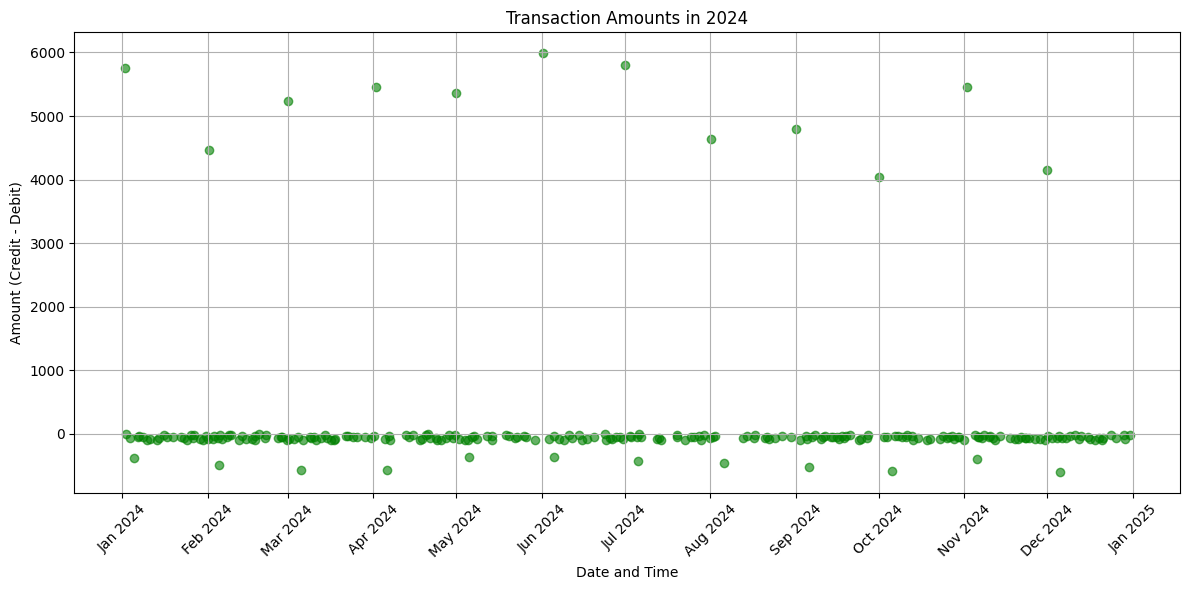

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Datetime'], df['Amount'], color='green', alpha=0.6)

plt.title("Transaction Amounts in 2024")
plt.xlabel("Date and Time")
plt.ylabel("Amount (Credit - Debit)")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Load the dataset
adf = pd.read_csv("Transaction_2025_With_Anomalies.csv")  # Use your correct path

# Convert Date and compute Amount
adf['Date'] = pd.to_datetime(adf['Date'])
adf['Amount'] = adf['Credit'].fillna(0) - adf['Debit'].fillna(0)

# Apply your anomaly detection function row-wise
adf['Anomaly'] = adf.apply(detect_monthly_anomaly, axis=1)

# Map anomaly labels to colors
colors = adf['Anomaly'].map({'Normal': 'green', 'Anomaly': 'red'})

[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12
[Info] Using latest available model from: 2024-12


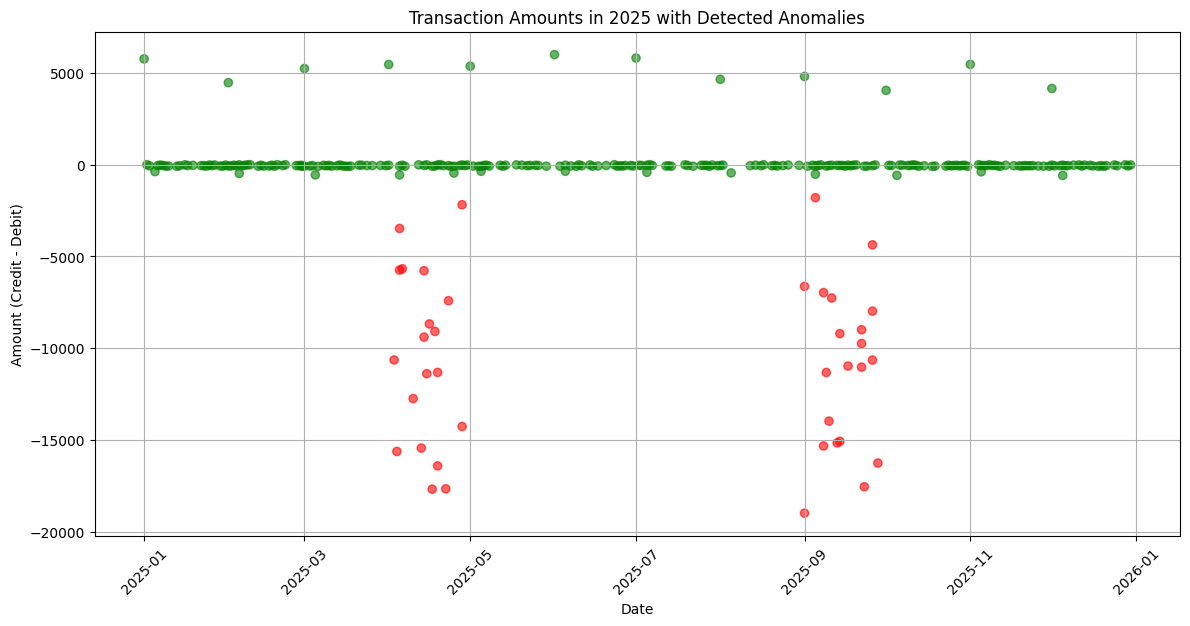

In [9]:
# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(adf['Date'], adf['Amount'], c=colors, alpha=0.6)
plt.title("Transaction Amounts in 2025 with Detected Anomalies")
plt.xlabel("Date")
plt.ylabel("Amount (Credit - Debit)")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

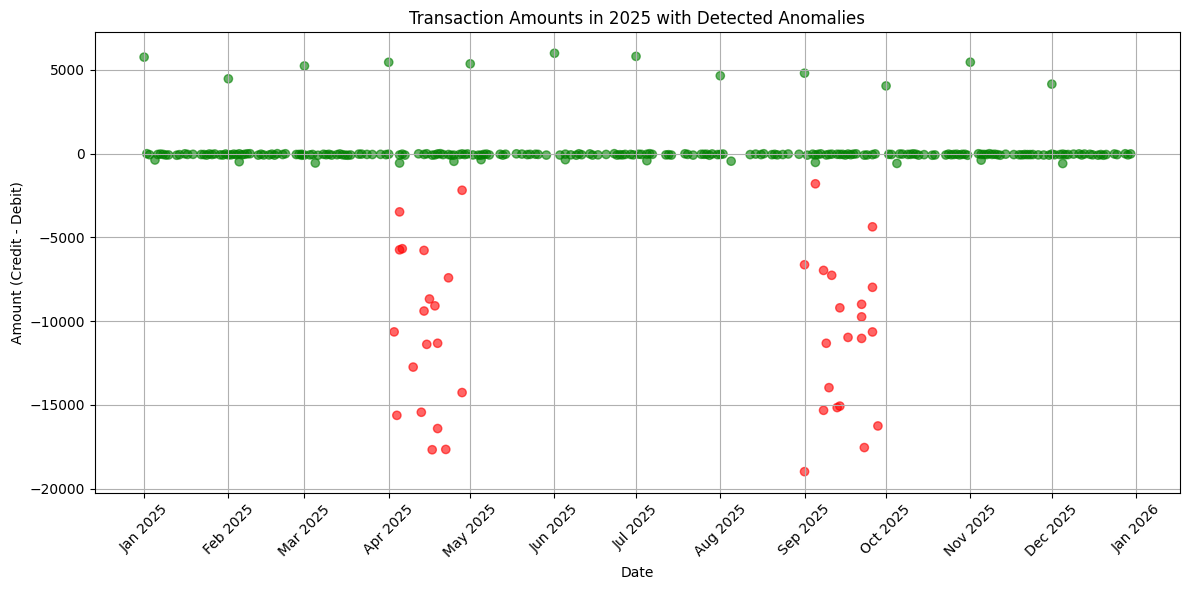

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(adf['Date'], adf['Amount'], c=colors, alpha=0.6)

plt.title("Transaction Amounts in 2025 with Detected Anomalies")
plt.xlabel("Date")
plt.ylabel("Amount (Credit - Debit)")

# Format x-axis to show monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Show both horizontal and vertical grid lines
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()